In [1]:
import tetra_analysis.ec_search.lightning as light
import datetime as dt
import time
import urllib2
from urllib2 import HTTPError

In [30]:
'''print the number of nearby strikes for a given date/loc'''

loop_date = dt.date(2018, 5, 1)
end_date = dt.date(2018, 6, 1)
source = ['entln','wwlln']
locations = ['LSU','PAN','PR','UAH']

while loop_date < end_date + dt.timedelta(1):
    for loc in locations:
        for s in source:
            x = light.nearby(loc, loop_date, s)
            if len(x[0]) > 0:
                print len(x[0]), 'strikes', loc, loop_date, s
    loop_date += dt.timedelta(1)

28 strikes PAN 2018-05-03 entln
16 strikes PAN 2018-05-03 wwlln
32 strikes PAN 2018-05-04 entln
16 strikes PAN 2018-05-04 wwlln
2 strikes PAN 2018-05-05 entln
1 strikes PAN 2018-05-05 wwlln
11 strikes PAN 2018-05-06 entln
5 strikes PAN 2018-05-06 wwlln
30 strikes PAN 2018-05-07 entln
14 strikes PAN 2018-05-07 wwlln
7 strikes UAH 2018-05-07 entln
2 strikes PAN 2018-05-09 entln
2 strikes PAN 2018-05-10 wwlln
2 strikes PAN 2018-05-11 entln
1 strikes PAN 2018-05-11 wwlln
10 strikes LSU 2018-05-12 entln
7 strikes LSU 2018-05-12 wwlln
1 strikes PAN 2018-05-13 wwlln
117 strikes LSU 2018-05-14 entln
1 strikes LSU 2018-05-14 wwlln
2 strikes PAN 2018-05-14 entln
305 strikes LSU 2018-05-15 entln
17 strikes LSU 2018-05-15 wwlln
144 strikes UAH 2018-05-15 entln
3 strikes UAH 2018-05-15 wwlln
9 strikes PAN 2018-05-16 entln
3 strikes PAN 2018-05-16 wwlln
10 strikes UAH 2018-05-16 entln
5 strikes PAN 2018-05-17 entln
3 strikes PAN 2018-05-17 wwlln
717 strikes LSU 2018-05-18 entln
50 strikes LSU 2018-0

In [5]:
'''compare wwlln and entln strikes'''

window = 1
loop_date = dt.date(2018, 5, 26)
end_date = dt.date(2018, 5, 26)
source = ['boltek', 'entln']
locations = ['LSU']
while loop_date < end_date + dt.timedelta(1):
    for loc in locations:
        strikes = {}
        for s in source:
            x = light.nearby(loc, loop_date, s)
            if len(x[0]) > 0:
                strikes[s] = x[0]
        match_num = 0
        if len(strikes['boltek']) + len(strikes['entln']) > 0:
            for l in strikes['entln']:
                diffs = np.abs(l-strikes['boltek'])
                matches = np.where(diffs <= window)[0]
                if len(matches) > 0:
                    match_num +=1
            if match_num > 0:
                print loc, str(loop_date)
                print str(match_num) + ' out of ' + str(len(strikes['entln'])) + ' strikes matched within ' + str(window) + ' seconds'
    loop_date += dt.timedelta(1)


 LSU 2018-05-26
2 out of 30 strikes matched within 1 seconds


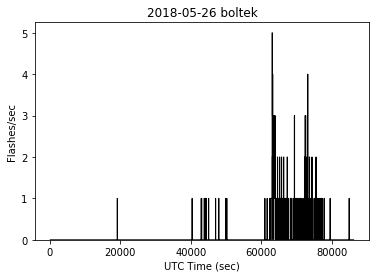

In [10]:
'''plot time histogram of strikes within 8 kilometers'''

d = dt.date(2018, 5, 26)
loc = 'LSU'
source = ['boltek']
for s in source:
    x = light.nearby(loc, d, s)
    bins = np.linspace(0, 86400, 1441)
    plt.hist(x[0], bins, histtype='step', color = 'black')
    plt.title(str(d) + ' ' + s)
    plt.ylabel('Flashes/sec')
    plt.xlabel('UTC Time (sec)')
    plt.show()

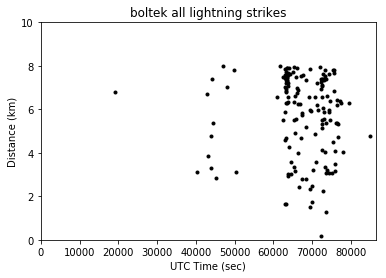

In [14]:
'''plot strikes vs distance'''

start_time = time.time()
d = dt.date(2018, 5, 26)
loc = 'LSU'
source = ['boltek']
for s in source:
    method = {'wwlln':light.wwlln,'entln':light.entln,'boltek':light.boltek}
    x = method[s](d, loc)
    plt.plot(x[0], x[1], lw = 0, marker = '.', color = 'black')
    plt.ylim(0, 10)
    plt.xlim(0, 86400)
    plt.ylabel("Distance (km)")
    plt.xlabel("UTC Time (sec)")
    plt.title(s + ' all lightning strikes')
    plt.show()

67434.0 UTC sees most strikes


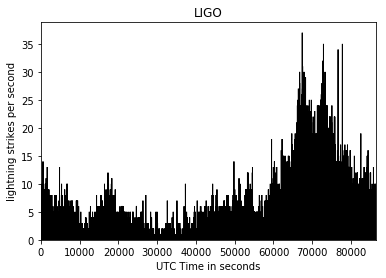

73907.0 UTC sees most strikes


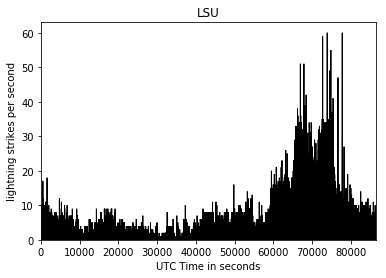

66982.0 UTC sees most strikes


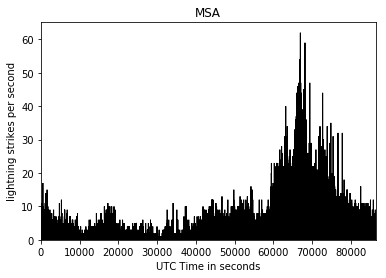

72722.0 UTC sees most strikes


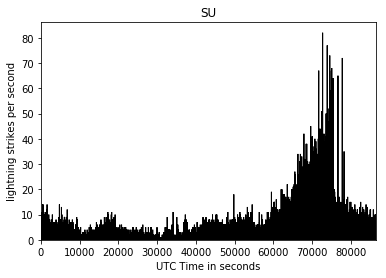

76683.0 UTC sees most strikes


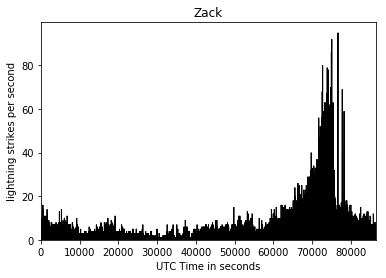

In [2]:
'''read in boltek data from http://fisica.uprb.edu/pub/ '''

loc = 'LSU'
d = dt.date(2018, 5, 26)
plot = 'yes' # 'yes' or 'no'

date_str = d.strftime("%Y%m%d")

if loc == 'LSU': 
    serve = 'LLDN'
    filenames = ['LSU-Tetra2-LDN-', 'SU-Tetra-', 'MSA-Tetra-', 'Zack-Tetra-', 'LIGO-Tetra-']   
if loc == 'PR': 
    serve = 'PRLDN'
    filenames = ['PRLDN-Ponce-', 'PRLDN-Cayey-', 'PRLDN-Bayamon-', 'PRLDN-Arecibo-', 'PRLDN-Utuado-']
    
strikes = {}
for f in filenames:
    if loc == 'LSU': key = f.split('-')[0]
    if loc == 'PR': key = f.split('-')[-2]
    try:
        data = urllib2.urlopen("http://fisica.uprb.edu/pub/" + serve + "/" + f + date_str + ".txt").read()
    except HTTPError:
        continue
    data = data.split("\n")
    data = data[:-1]
    s = []
    for line in data:
        x = line.split()
        s.append(x[0])
    s = s[:-1]
    s = lightning.get_times(s)
    strikes[key] = s

if plot == 'no':
    for k in strikes.keys():
        print str(len(strikes[k])) + ' strikes detected by boltek antenna at ' + k

if plot == 'yes':
    bins = np.linspace(0,86400,86401)
    for k in strikes.keys():
        x = plt.hist(strikes[k], bins, histtype='step', color='black')
        plt.xlim([0,86400])
        plt.title(k)
        plt.ylabel('lightning strikes per second')
        plt.xlabel('UTC Time in seconds')
        plt.show()

In [26]:
#get wwlln data for Jonah
#save a file with 'YYYY-MM-DD' \t 'hh:mm:ss.sssss' \t lat \t lon

import tetra_tools.tools as tool
import tetra_analysis.ec_search.lightning as light
import csv

d = dt.date(2018, 5, 26)
loc = 'LSU'

lats, lons, times, dates, dists = [], [], [], [], []

d_str = d.strftime("%Y%m%d")
filename0 = 'C:/Users/tetra/lightning/WWLLN/'
folder = d.strftime("%Y_%m")
fname = 'C:/Users/tetra/lightning/WWLLN/{0}/AE{1}.loc'.format(folder, d_str)
if not os.path.isfile(fname):
    fname = 'C:/Users/tetra/lightning/WWLLN/{0}/A{1}.loc'.format(folder, d_str)
if not os.path.isfile(fname):
    pass
det_pos = tool.det_location(loc)

try:
    f = open(fname)
except NameError:
    pass
except IOError:
    pass
strikes_raw = []
for line in f:
    strikes_raw.append(line)
f.close()

for s in strikes_raw:
    lat = float(s.split(',')[2])
    lon = float(s.split(',')[3])
    if np.abs(lat - det_pos[0]) <= 2 and np.abs(lon - det_pos[1]) <= 2:
        lats.append(lat)
        lons.append(lon)
        times.append(s.split(',')[1])
        dates.append(s.split(',')[0])
dists = light.get_dists(lats, lons, det_pos)
        
lats2, lons2, times2, dates2 = [], [], [], []
for i in range(len(dists)):
    if dists[i] <= 8:
        lats2.append(lats[i])
        lons2.append(lons[i])
        times2.append(times_str[i])
        dates2.append(date_str2[i])
    
strikes_all2 = zip(dates2, times2, lats2, lons2)
with open('C:/Users/tetra/lightning/test.txt', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(strikes_all2)


3


In [17]:
#get entln data for Jonah
#save a file with 'YYYY-MM-DD' \t 'hh:mm:ss.sssss' \t lat \t lon

import tetra_tools.tools as tool
import tetra_analysis.ec_search.lightning as light
import csv

d = dt.date(2018, 5, 26)
loc = 'LSU'

lats, lons, times, dates, dists = [], [], [], [], []


folder = 'C:/Users/tetra/lightning/ENTLN/{0}/'.format(loc)
d_int = int(d.strftime("%Y%m%d"))
d_str = d.strftime("%Y-%m-%d")
det_pos = tool.det_location(loc)


for f in os.listdir(folder):
    if d_int > int(f[0:8]) and d_int < int(f[12:20]):
        fname = folder + f
        with open(fname, 'rb') as infile:
            temp = csv.reader(infile)
            for row in temp:
                if row[1] == 'timestamp':
                    continue
                # sp included because in some files there is an extra space 
                # before the date
                sp = 0
                if row[1][0] == ' ': sp = 1
                if row[1][0 + sp:10 + sp] == d_str:
                    lats.append(row[2])
                    lons.append(row[3])
                    times.append(row[1][11+sp:])
                    dates.append(row[1][0 + sp:10 + sp])
        dists = light.get_dists(lats, lons, det_pos)
        
lats2, lons2, times2, dates2 = [], [], [], []
for i in range(len(dists)):
    if dists[i] <= 8:
        lats2.append(lats[i])
        lons2.append(lons[i])
        times2.append(times_str[i])
        dates2.append(date_str2[i])

    
strikes_all2 = zip(dates2, times2, lats2, lons2)
with open('C:/Users/tetra/lightning/entln20180526.txt', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(strikes_all2)